In [2]:
import os
import re
import nltk
import random
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer

In [3]:
path = "./data/corpus_bbc.csv"

df_corpus = pd.read_csv(path, sep=';', index_col=0)
print(f"Shape of DF {df_corpus.shape}")
df_corpus.describe()

Shape of DF (2225, 3)


,id
count,2225.000000
mean,226.321798
std,134.218688
min,1.000000
25%,112.000000
50%,223.000000
75%,334.000000
max,511.000000


In [4]:
df_corpus.columns

Index(['id', 'content', 'label'], dtype='object')

In [5]:
df_corpus.groupby(by=['label']).count()

,id,content
label,,
business,510,510
entertainment,386,386
politics,417,417
sport,511,511
tech,401,401


In [6]:
random.seed(45256)

txt_b11 = random.randint(0, 509)
txt_b12 = random.randint(0, 509)

txt_e11 = random.randint(510, 895)
txt_e12 = random.randint(510, 895)

txt_p11 = random.randint(896, 1312)
txt_p12 = random.randint(896, 1312)

txt_s11 = random.randint(1313, 1823)
txt_s12 = random.randint(1313, 1823)

txt_t11 = random.randint(1824, 2224)
txt_t12 = random.randint(1824, 2224)

idx_txt_list = [txt_b11, txt_b12, 
                txt_e11, txt_e12, 
                txt_p11, txt_p12, 
                txt_s11, txt_s12,
                txt_t11, txt_t11]

print(idx_txt_list)

[261, 287, 726, 512, 1101, 992, 1328, 1789, 1860, 1860]


In [7]:
df_subset10 = pd.DataFrame(data=df_corpus.iloc[idx_txt_list], columns=df_corpus.columns).reset_index()

df_subset10

,index,id,content,label
0,261,262,Asian quake hits European shares\n\nShares in ...,business
1,287,288,GE sees 'excellent' world economy\n\nUS behemo...,business
2,216,217,Baywatch dubbed 'worst TV import'\n\nSurf show...,entertainment
3,2,3,Musical treatment for Capra film\n\nThe classi...,entertainment
4,205,206,Blair's hope for Blunkett return\n\nThe events...,politics
5,96,97,UK plan to deport terror suspects\n\nDeals are...,politics
6,15,16,Verdict delay for Greek sprinters\n\nGreek ath...,sport
7,476,477,Moya suffers shock loss\n\nFifth seed Carlos M...,sport
8,36,37,US woman sues over cartridges\n\nA US woman is...,tech
9,36,37,US woman sues over cartridges\n\nA US woman is...,tech


### Pré-Processing

In [8]:
def remove_punctuation(txt):
    return re.sub('[%s]' % re.escape(string.punctuation), ' ', txt)

df_subset10 = df_subset10.replace(to_replace=r'\w*\d\w*', value='', regex=True)# Delet numbers

In [9]:
df_subset10.head()

,index,id,content,label
0,261,262,Asian quake hits European shares\n\nShares in ...,business
1,287,288,GE sees 'excellent' world economy\n\nUS behemo...,business
2,216,217,Baywatch dubbed 'worst TV import'\n\nSurf show...,entertainment
3,2,3,Musical treatment for Capra film\n\nThe classi...,entertainment
4,205,206,Blair's hope for Blunkett return\n\nThe events...,politics


In [10]:
for i in range(df_subset10['content'].shape[0]):
    df_subset10['content'] = df_subset10['content'].str.lower()
    #print(f"Index {i}")
    # print(df_subset10['content'])

In [11]:
df_subset10['content'] = df_subset10['content'].apply(remove_punctuation)

df_subset10.head()

,index,id,content,label
0,261,262,asian quake hits european shares\n\nshares in ...,business
1,287,288,ge sees excellent world economy\n\nus behemo...,business
2,216,217,baywatch dubbed worst tv import \n\nsurf show...,entertainment
3,2,3,musical treatment for capra film\n\nthe classi...,entertainment
4,205,206,blair s hope for blunkett return\n\nthe events...,politics


# Questão 1

### (a) Count Vectorizer

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
x_token_text = cv.fit_transform(df_subset10.content)
pd_vectorize = pd.DataFrame(x_token_text.toarray(), columns=cv.get_feature_names_out())
print(pd_vectorize)

   ability  accident  according  account  accused  acquitted  actually  added  \
0        0         0          0        1        0          0         0      0   
1        0         0          0        0        0          0         0      0   
2        0         0          1        0        0          0         0      0   
3        0         0          0        0        0          0         0      0   
4        1         0          0        0        0          0         0      0   
5        1         0          0        0        2          0         2      1   
6        0         1          0        0        0          1         0      0   
7        0         0          0        0        0          0         0      0   
8        0         0          0        0        0          0         0      0   
9        0         0          0        0        0          0         0      0   

   adjustments  advise  ...  worried  worries  worst  worth  wrong  wrote  \
0            1       0  ...    

In [13]:
#Calculando para todos os documentos a similaridade por cosseno.
from itertools import combinations
from sklearn.metrics.pairwise import cosine_similarity

pairs = list(combinations(range(df_subset10.shape[0]), 2)) #Pegando os pares de index
print(pairs)

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 6), (5, 7), (5, 8), (5, 9), (6, 7), (6, 8), (6, 9), (7, 8), (7, 9), (8, 9)]


In [14]:
combos = [(df_subset10['content'][a_idx], df_subset10['content'][b_idx]) for (a_idx, b_idx) in pairs]

In [15]:
results = [cosine_similarity(x_token_text[a_idx], x_token_text[b_idx]) for (a_idx, b_idx) in pairs]
sorted(zip(results, combos), reverse=True)

[(array([[1.]]),
  ('us woman sues over cartridges\n\na us woman is suing hewlett packard  hp   saying its printer ink cartridges are secretly programmed to expire on a certain date \n\nthe unnamed woman from georgia says that a chip inside the cartridge tells the printer that it needs re filling even when it does not  the lawsuit seeks to represent anyone in the us who has purchased an hp inkjet printer since february   hp  the world s biggest printer firm  declined to comment on the lawsuit  hp ink cartridges use a chip technology to sense when they are low on ink and advise the user to make a change \n\nbut the suit claims the chips also shut down the cartridges at a predetermined date regardless of whether they are empty   the smart chip is dually engineered to prematurely register ink depletion and to render a cartridge unusable through the use of a built in expiration date that is not revealed to the consumer   the suit said  the lawsuit is asking for restitution  damages and oth

### (b) TF-IDF

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

cv_tfidf = TfidfVectorizer(stop_words="english")
x_token_text_tfidf = cv_tfidf.fit_transform(df_subset10.content)
pd_vectorize_tfidf = pd.DataFrame(x_token_text_tfidf.toarray(), columns=cv.get_feature_names_out())
print(pd_vectorize_tfidf)

    ability  accident  according   account   accused  acquitted  actually  \
0  0.000000  0.000000   0.000000  0.043007  0.000000   0.000000  0.000000   
1  0.000000  0.000000   0.000000  0.000000  0.000000   0.000000  0.000000   
2  0.000000  0.000000   0.082762  0.000000  0.000000   0.000000  0.000000   
3  0.000000  0.000000   0.000000  0.000000  0.000000   0.000000  0.000000   
4  0.059377  0.000000   0.000000  0.000000  0.000000   0.000000  0.000000   
5  0.042132  0.000000   0.000000  0.000000  0.099123   0.000000  0.099123   
6  0.000000  0.068257   0.000000  0.000000  0.000000   0.068257  0.000000   
7  0.000000  0.000000   0.000000  0.000000  0.000000   0.000000  0.000000   
8  0.000000  0.000000   0.000000  0.000000  0.000000   0.000000  0.000000   
9  0.000000  0.000000   0.000000  0.000000  0.000000   0.000000  0.000000   

      added  adjustments    advise  ...   worried   worries     worst  \
0  0.000000     0.043007  0.000000  ...  0.043007  0.043007  0.073119   
1  0.0

In [17]:
results_tfidf = [cosine_similarity(x_token_text_tfidf[a_idx], x_token_text_tfidf[b_idx]) for (a_idx, b_idx) in pairs]
sorted(zip(results_tfidf, combos), reverse=True)

[(array([[1.]]),
  ('us woman sues over cartridges\n\na us woman is suing hewlett packard  hp   saying its printer ink cartridges are secretly programmed to expire on a certain date \n\nthe unnamed woman from georgia says that a chip inside the cartridge tells the printer that it needs re filling even when it does not  the lawsuit seeks to represent anyone in the us who has purchased an hp inkjet printer since february   hp  the world s biggest printer firm  declined to comment on the lawsuit  hp ink cartridges use a chip technology to sense when they are low on ink and advise the user to make a change \n\nbut the suit claims the chips also shut down the cartridges at a predetermined date regardless of whether they are empty   the smart chip is dually engineered to prematurely register ink depletion and to render a cartridge unusable through the use of a built in expiration date that is not revealed to the consumer   the suit said  the lawsuit is asking for restitution  damages and oth

# Questão 2

### (a) Rótulo dos docs

In [18]:
df_corpus.groupby(by=['label']).count()

,id,content
label,,
business,510,510
entertainment,386,386
politics,417,417
sport,511,511
tech,401,401


Selecionar duas classes cujas quantidades em cada uma seja a mesma ou similar (dados balanceados)

In [19]:
df_business = df_corpus.loc[df_corpus['label'] == 'business']
df_sport = df_corpus.loc[df_corpus['label'] == 'sport']

frames = [df_business, df_sport]

df_binary = pd.concat(frames)

df_binary.groupby(by=['label']).count()

,id,content
label,,
business,510,510
sport,511,511


In [20]:
df_binary['content'] = df_binary['content'].replace(to_replace=r'\w*\d\w*', value='', regex=True)
df_binary.head(5)

,id,content,label
0,1,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,2,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,3,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,4,High fuel prices hit BA's profits\n\nBritish A...,business
4,5,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [21]:
df_binary['content'] = df_binary['content'].apply(remove_punctuation)# Removendo pontuação

df_binary['content'] = df_binary.content.str.lower()# Deixando tudo minúsculo
df_binary.content

0      ad sales boost time warner profit\n\nquarterly...
1      dollar gains on greenspan speech\n\nthe dollar...
2      yukos unit buyer faces loan claim\n\nthe owner...
3      high fuel prices hit ba s profits\n\nbritish a...
4      pernod takeover talk lifts domecq\n\nshares in...
                             ...                        
506    big guns ease through in san jose\n\ntop seede...
507    almagro continues spanish surge\n\nunseeded ni...
508    melzer shocks agassi in san jose\n\nsecond see...
509    mirza makes indian tennis history\n\nteenager ...
510    roddick to face saulnier in final\n\nandy rodd...
Name: content, Length: 1021, dtype: object

In [22]:
X = df_binary.content
y = df_binary.label

print("Shape X: ", X.shape)
print("Shape y: ", y.shape)

Shape X:  (1021,)
Shape y:  (1021,)


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X train: ", X_train.shape)
print("Y train: ", y_train.shape)
print("X test: ", X_test.shape)
print("Y test: ", y_test.shape)

X train:  (714,)
Y train:  (714,)
X test:  (307,)
Y test:  (307,)


### (b) Representações vetoriais (etapa de Transformação no KDD)

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')

X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)
print("X_train_cv: ", X_train_cv.toarray().shape)
print("X_test_cv: ", X_test_cv.toarray().shape)

X_train_cv:  (714, 13673)
X_test_cv:  (307, 13673)


In [25]:
# Step 3 - Enconde the input using One-Hot Encode
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)
print("x_train_tfidf: ", X_train_tfidf.toarray().shape)
print("X_test_tfidf: ", X_test_tfidf.toarray().shape)

x_train_tfidf:  (714, 13673)
X_test_tfidf:  (307, 13673)


### (c) Classificador usando Regressão Logística

In [26]:
from sklearn.linear_model import LogisticRegression

lr_cv = LogisticRegression().fit(X_train_cv, y_train)
lr_tfidf = LogisticRegression().fit(X_train_tfidf, y_train)

y_pred_cv_lr = lr_cv.predict(X_test_cv)
y_pred_tfidf_lr = lr_tfidf.predict(X_test_tfidf)

### Matriz confusão usando Count Vectorizer

In [33]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_lr_cv = confusion_matrix(y_test, y_pred_cv_lr)
print("Confusion matrix: Logistic Regression: ")
print(cm_lr_cv)

Confusion matrix: Logistic Regression: 
[[155   2]
 [  0 150]]


In [35]:
sport_true = int(0)
sport_pred_cv_lr = int(0)
business_true = int(0)
business_pred_cv_lr = int(0)

for idx, cont in enumerate(y_test):
  if cont == "sport":
    sport_true = sport_true + 1
  else:
    business_true = business_true + 1

for idx2, cont2 in enumerate(y_pred_cv_lr):
  if cont2 == "sport":
    sport_pred_cv_lr = sport_pred_cv_lr + 1
  else:
    business_pred_cv_lr = business_pred_cv_lr + 1

print("Sport true: ", sport_true)
print("Business true: ", business_true)
print("Sport pred: ", sport_pred_cv_lr)
print("Business pred ", business_pred_cv_lr)
# print("Confusion matrix: Logistic Regression")
# print(cm_lr_cv)

Sport true:  150
Business true:  157
Sport pred:  152
Business pred  155


In [77]:
group_names_lr_cv = ['TP', 'FN', 'FP', 'TF']

group_counts_lr_cv = ["{0:0.0f}".format(value) for value in cm_lr_cv.flatten()]

group_per_lr_cv = ["{0:.2%}".format(value) for value in cm_lr_cv.flatten()/np.sum(cm_lr_cv)]

labels_lr_cv = [f"{v1}\n{v2}\n{v3}" 
                for (v1, v2, v3) in zip(group_names_lr_cv, group_counts_lr_cv, group_per_lr_cv)]

labels_lr_cv = np.asarray(labels_lr_cv).reshape(2, 2)
print(labels_lr_cv)

[['TP\n155\n50.49%' 'FN\n2\n0.65%']
 ['FP\n0\n0.00%' 'TF\n150\n48.86%']]


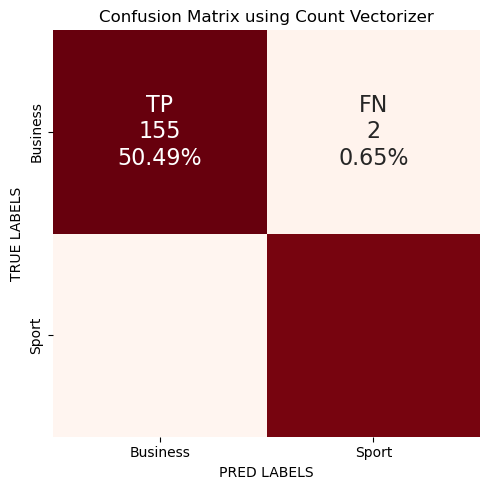

In [80]:
plt.figure(figsize=(5, 5))
ax = plt.subplot()
ax = sns.heatmap(cm_lr_cv, 
                 xticklabels=['Business','Sport'],
                 yticklabels=['Business','Sport'],
                 annot=labels_lr_cv,
                 fmt='', 
                 annot_kws={'fontsize':16}, cbar=False, cmap="Reds", ax=ax)
ax.set_title('Confusion Matrix using Count Vectorizer')
ax.set_xlabel('PRED LABELS')
ax.set_ylabel('TRUE LABELS')
plt.tight_layout()